# Insights on Ford GoBike System Data
## by Oluwanifemi Favour Olajuyigbe


## Investigation Overview

In this investigation, I was interested in figuring out the answer to three questions, which include:
- What time/period most trips are taken?
- What factors affected the duration of the trip?


## Dataset Overview

The original data consisted of information about approximately 180,000 individual rides with 16 features. However, after being properly cleaned, the data contained 174,391 ride information and 11 attributes. The features included the five main areas of focus, duration_min, start_weekday, start_period, start_hour, user_type, as well as additional attributes such as start_day, member_birth_year, member_gender, age, duration_sec and start_station_name. 9,021 data points were removed from the original analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_ford_gobike_dataset.csv')

In [3]:
# convert start_weekday and start_period into ordered categorical types
var_dict = {'start_weekday': ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'start_period': ['Late Night','Early Morning','Morning','Noon','Evening','Night']}

for var in var_dict:
    var_type = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_dict[var])
    df[var] = df[var].astype(var_type)
    
df['user_type'] = df['user_type'].astype('category')

## What time/period were most trips taken?

In [4]:
# function to plot the distribution of a feature on a countplot
base_color = sns.color_palette()[0]

# function to set the labels for the x-axis, y-axis and the title of the plots
def label(x_label,y_label,title):
    '''Sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()  
    
def countplot(x_axis,x_label,y_label,title,rotation=0):
    '''Plots the distribution of a feature on a countplot and 
    sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.figure(figsize=(10,7))
    sns.countplot(data=df, x=x_axis, color=base_color)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()   

### Distribution of Days of the Week
Most trips were taken generally during weekdays, but more specifically on Thursdays as it had the highest number of trips started. Then, weekends (Saturdays and Sundays) had the lowest turn up rate.

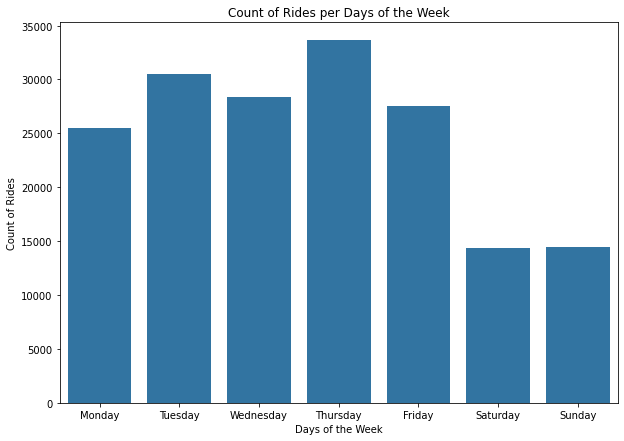

In [5]:
countplot('start_weekday', 'Days of the Week', 'Count of Rides', 'Count of Rides per Days of the Week')

### Distribution of Start Period
People mostly took rides in the evenings, and then the mornings which had the second highest count of rides. Only a handful of people took rides in the late nights.

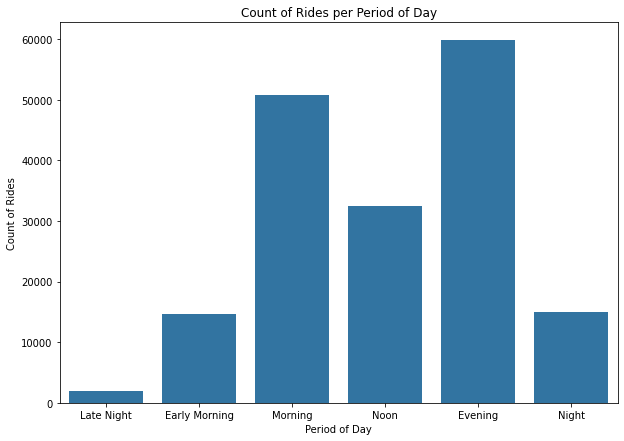

In [6]:
countplot('start_period', 'Period of Day', 'Count of Rides', 'Count of Rides per Period of Day')

### Distribution of Hour the Trips Started
Most trips started at 8am and 5pm, then the least trips were taken at 3am. Here we see more specifically that more than 20,000 people have bike trips during the hours of 5pm and 8am, while between 1 and 4am not up to a thousand people go on a bike trip. Then an average of 7500 people had bike trips from 10am to 3pm.

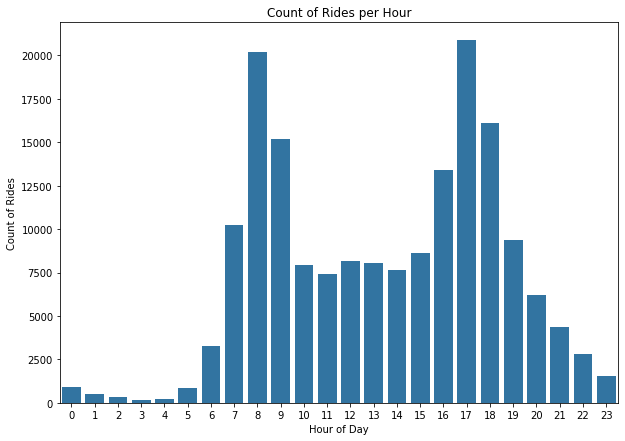

In [7]:
countplot('start_hour', 'Hour of Day', 'Count of Rides', 'Count of Rides per Hour')

## Distribution of Duration in Minutes
The duration in minutes took on a large range of values and was highly skewed to the right. After performing a log transformation on the variable, the distribution of the duration took on a unimodal shape, with its peak between 5 and 20 minutes.

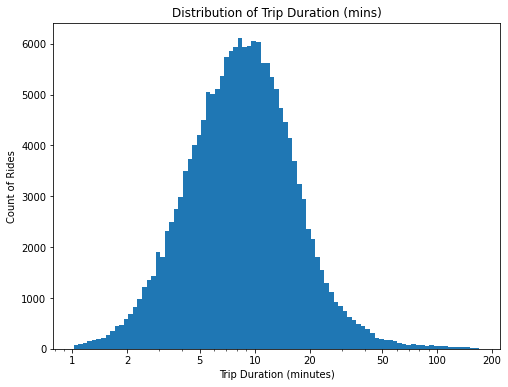

In [8]:
log_binsize = 0.025
bins = 10 ** np.arange(np.log10(df.duration_min.min()), np.log10(df.duration_min.max())+log_binsize, log_binsize)
ticks = [1, 2, 5, 10, 20, 50,100,200]
labels = [f'{x}' for x in ticks]

plt.figure(figsize=(8, 6))
plt.hist(data = df, x ='duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
label('Trip Duration (minutes)', 'Count of Rides', 'Distribution of Trip Duration (mins)')

## What Factors had an Effect on the Duration of Trip?



### Duration (min) vs. Week Day
Plotting duration on a logarithmic scale, it can be seen that individuals had longer trips during the weekends, that is, Saturday and Sunday, than weekdays (Monday to Friday)

In [9]:
def box_plot(y_axis,y_label,title):
    '''shows the box plot of a feature with the duration_min and 
    sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='duration_min', y=y_axis, color=base_color)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.title(title)
    plt.xlabel('Duration in minutes')
    plt.ylabel(y_label)
    plt.show()

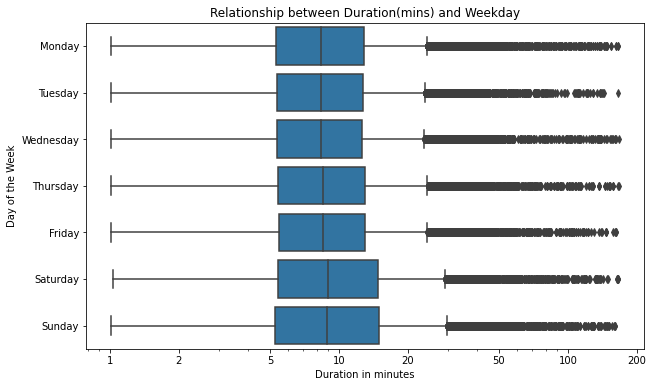

In [10]:
box_plot('start_weekday','Day of the Week','Relationship between Duration(mins) and Weekday')

### Duration (min) vs. User Type
Plotting duration on a logarithmic scale, it can be seen that customers had a longer trip than subscribers.

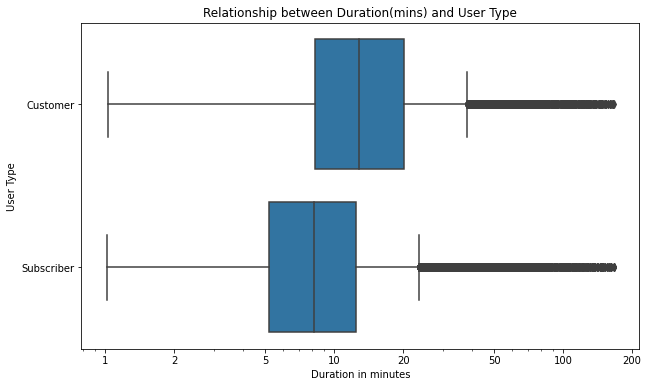

In [11]:
box_plot('user_type','User Type','Relationship between Duration(mins) and User Type')

### Duration (min) by User Type and Week Day
Customers generally have a longer ride than subscribers regardless of the day of the week

In [12]:
def facetgrid(col, x_axis):
    g = sns.FacetGrid(data=df, col=col, col_wrap=4, height=3)
    g.map(sns.boxplot, x_axis, 'duration_min')
    plt.yscale('log')
    plt.yticks(ticks, labels)

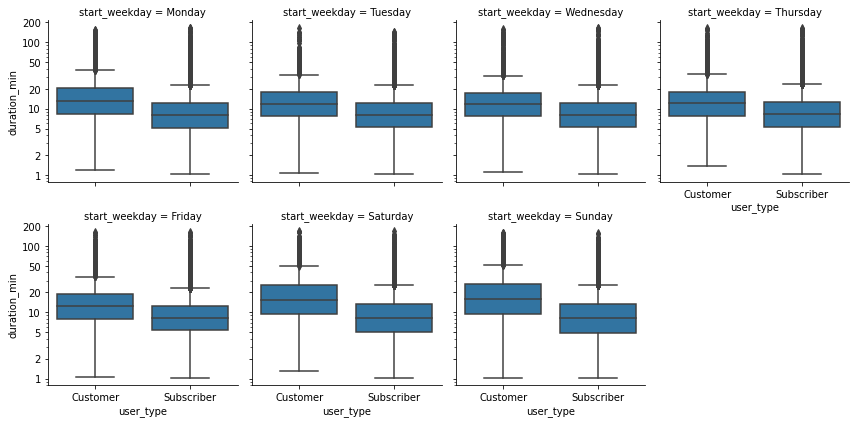

In [13]:
facetgrid('start_weekday', 'user_type')

In [ ]:
!jupyter nbconvert Ford_GoBike_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt